In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
boston  = fetch_openml(name = "boston" , version = 1 , as_frame=True)

In [ ]:
boston.data.shape

(506, 13)

In [ ]:
boston.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [ ]:
data = pd.DataFrame(boston.data)
data.colums = boston.feature_names

data.head(10)

/tmp/ipython-input-1233704169.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.colums = boston.feature_names


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10


In [ ]:
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Input Data
x = boston.data

# Output Data
y = boston.target

X = x.astype(float)
Y = y.astype(float)

X = x.values
Y = y.values


# splitting data to training and testing dataset.

#from sklearn.cross_validation import train_test_split
#the submodule cross_validation is renamed and deprecated to model_selection
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size =0.2,
                                                    random_state = 0)

print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (404, 13)
xtest shape  :  (102, 13)
ytrain shape :  (404,)
ytest shape  :  (102,)


In [ ]:
# Fitting Multi Linear regression model to training model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

print(type(xtest))
y_pred = regressor.predict(xtest)

<class 'numpy.ndarray'>


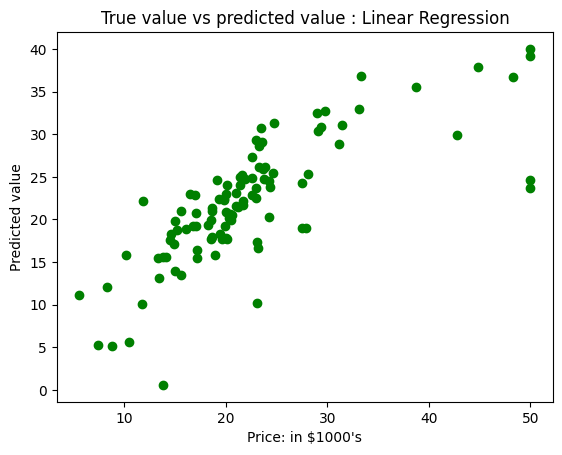

In [ ]:
# Plotting Scatter graph to show the prediction
# results - 'ytrue' value vs 'y_pred' value
plt.scatter(ytest, y_pred, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Square Error :  33.44897999767653
Mean Absolute Error :  3.8429092204444966
